Huilin Chang, Gavin Wiehl, Travis Vitello
DS5559

In [1]:
import json

In [2]:
from pyspark.ml import *
from pyspark.ml.classification import *
from pyspark.ml.feature import *
from pyspark.ml.param import *
from pyspark.ml.tuning import *
from pyspark.ml.evaluation import *
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import rand 
from sklearn.metrics import classification_report
from time import time
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, Row

In [3]:
# from pyspark import SparkContext
# sc = SparkContext.getOrCreate()

In [4]:
import os
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [5]:
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel

# Load and parse the data
# Read data in json format
df = spark.read.json("reviews_Baby_5.json.gz")

In [6]:
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from functools import reduce
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import pandas as pd
import re
import string

In [7]:
df.show(5)

+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|      asin|helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|
+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|097293751X| [0, 0]|    5.0|Perfect for new p...|07 16, 2013|A1HK2FQW6KXQB2|Amanda Johnsen "A...|             Awesine|    1373932800|
|097293751X| [0, 0]|    5.0|This book is such...|06 29, 2013|A19K65VY14D13R|              angela|Should be require...|    1372464000|
|097293751X| [0, 0]|    5.0|Helps me know exa...|03 19, 2014|A2LL1TGG90977E|              Carter|Grandmother watch...|    1395187200|
|097293751X| [0, 0]|    5.0|I bought this a f...|08 17, 2013| A5G19RYX8599E|        cfpurplerose|        repeat buyer|    1376697600|
|097293751X| [0, 0]|    4.0|I wanted an alter...| 04 1, 2014| 

In [8]:
import json
import pandas as pd
data_df = pd.read_json('reviews_Baby_5.json.gz', lines=True)

In [9]:
data_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"
...,...,...,...,...,...,...,...,...,...
160787,A30J0DKNKCF7SR,B00L13XFIE,SD,"[0, 0]",Bought this as a baby gift and my friend heard...,5,Great baby gift,1391126400,"01 31, 2014"
160788,AG4E44KM93P4L,B00L13XFIE,Silofish,"[0, 1]",I am new to cloth diapering. I was leery that ...,4,Not too bulky,1343606400,"07 30, 2012"
160789,A2UZUH4QHV4HA1,B00L13XFIE,"S. Smith ""sunnshyne309""","[0, 0]",My friend is planning on cloth diapering and I...,5,great help!,1364256000,"03 26, 2013"
160790,A2Z26PUQPMT5JV,B00L13XFIE,Stephanie S. Kim,"[0, 0]",We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,1391731200,"02 7, 2014"


In [10]:
data_df.shape

(160792, 9)

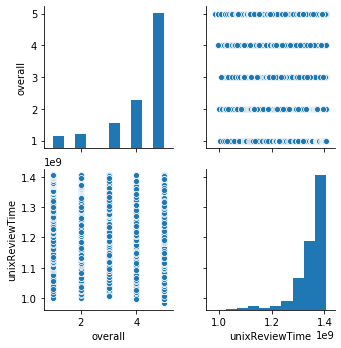

In [11]:
import seaborn as sns
sns.pairplot(data_df)

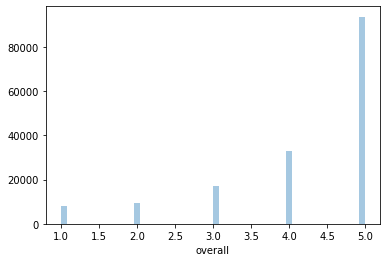

In [12]:
from matplotlib import pyplot as plt
sns.distplot(data_df['overall'],kde = False)
plt.show()

In [13]:
data_df.count()

reviewerID        160792
asin              160792
reviewerName      159427
helpful           160792
reviewText        160792
overall           160792
summary           160792
unixReviewTime    160792
reviewTime        160792
dtype: int64

In [14]:
from pyspark.sql.types import *
from pyspark.sql.functions import col, lit
from functools import reduce
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import pandas as pd
import re
import string

In [15]:
df.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)



In [16]:
df_n = df.select("reviewText")

In [17]:
df.describe("overall").show()

+-------+-----------------+
|summary|          overall|
+-------+-----------------+
|  count|           160792|
|   mean|4.214115130105975|
| stddev|1.144324709108409|
|    min|              1.0|
|    max|              5.0|
+-------+-----------------+



## Remove netutal: overall = 3

In [18]:
df1 = df.filter("overall != 3")

In [19]:
from pyspark.ml.feature import Bucketizer
splits = [-float("inf"), 4, float("inf")]
bucketizer = Bucketizer(splits=splits, inputCol="overall", outputCol="label")

In [20]:
df2= bucketizer.transform(df1)

In [21]:
df2.groupBy("overall","label").count().show()

+-------+-----+-----+
|overall|label|count|
+-------+-----+-----+
|    2.0|  0.0| 9193|
|    5.0|  1.0|93526|
|    1.0|  0.0| 7819|
|    4.0|  1.0|32999|
+-------+-----+-----+



In [22]:
df3 = df2.groupBy("reviewText","label").count().show()

+--------------------+-----+-----+
|          reviewText|label|count|
+--------------------+-----+-----+
|This item was ext...|  1.0|    1|
|This has been my ...|  1.0|    1|
|We bought these t...|  1.0|    1|
|I was skeptical a...|  1.0|    1|
|In registering an...|  1.0|    1|
|You cannot imagin...|  1.0|    1|
|We needed a gate ...|  1.0|    1|
|This fits well an...|  1.0|    1|
|Easy to install. ...|  1.0|    1|
|This tub is perfe...|  1.0|    1|
|These work great ...|  1.0|    1|
|We have had this ...|  1.0|    1|
|I used to have on...|  1.0|    1|
|These bugs are a ...|  1.0|    1|
|Don't read negati...|  1.0|    1|
|I bought these bo...|  0.0|    1|
|My daughter was n...|  1.0|    1|
|I initially got t...|  1.0|    1|
|I'm not sure if i...|  1.0|    1|
|i love this seat!...|  1.0|    1|
+--------------------+-----+-----+
only showing top 20 rows



In [23]:
df4 = df2.select("reviewText","label")

In [24]:
df4.show()

+--------------------+-----+
|          reviewText|label|
+--------------------+-----+
|Perfect for new p...|  1.0|
|This book is such...|  1.0|
|Helps me know exa...|  1.0|
|I bought this a f...|  1.0|
|I wanted an alter...|  1.0|
|This is great for...|  1.0|
|My 3 month old so...|  1.0|
|This book is perf...|  1.0|
|The Baby Tracker ...|  1.0|
|During your postp...|  1.0|
|I use this so tha...|  1.0|
|This book is a gr...|  1.0|
|Has columns for a...|  1.0|
|Easy to use, simp...|  1.0|
|We used this to h...|  1.0|
|This item was ext...|  1.0|
|I've been using t...|  1.0|
|Of course this ha...|  1.0|
|I've been using t...|  1.0|
|I didn't think I ...|  1.0|
+--------------------+-----+
only showing top 20 rows



## train, test split

In [25]:
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF
from pyspark.ml.feature import StopWordsRemover

In [26]:
from pyspark.ml.feature import StringIndexer
##### convert the distinct labels in the input dataset to index values
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(df4)
##### tokenizer 
tokenizer = RegexTokenizer(inputCol="reviewText", outputCol="words", pattern="\W")##'\w' remove none-word letters
df_tokenized = tokenizer.transform(df4)
##### remove stop words
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
df_removed = remover.transform(df_tokenized)
##### Convert to TF words vector
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures")
df_TF = hashingTF.transform(df_removed)
##### Convert to TF*IDF words vector
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(df_TF)
df_idf = idfModel.transform(df_TF)
for features_label in df_idf.select("features", "label").take(3):
    print(features_label)

Row(features=SparseVector(262144, {9559: 6.5513, 15664: 2.2981, 17252: 3.9359, 29945: 2.7983, 32890: 2.3226, 32957: 5.7195, 63689: 3.0557, 70418: 3.0871, 81046: 1.9048, 82111: 2.0935, 92646: 3.502, 101464: 2.6963, 105535: 6.0783, 109810: 5.1773, 118590: 2.5943, 127382: 3.9281, 140784: 2.45, 143288: 7.6548, 172517: 7.7818, 176996: 1.0783, 216086: 7.2996, 238301: 2.3603, 238605: 2.5644, 256693: 3.7559}), label=1.0)
Row(features=SparseVector(262144, {5795: 8.7643, 9559: 6.5513, 24145: 3.2479, 32957: 5.7195, 37101: 4.4041, 66092: 2.9754, 70028: 2.3969, 74383: 4.9837, 83756: 3.869, 84077: 5.9237, 101464: 2.6963, 108335: 9.1663, 108363: 4.8364, 118590: 2.5943, 120418: 4.3996, 125372: 1.1808, 126017: 8.0032, 132270: 2.1778, 132538: 4.7507, 136243: 5.2424, 141522: 2.9553, 144620: 7.4799, 146139: 3.5425, 148067: 6.8006, 158845: 5.4791, 160043: 4.6402, 172477: 2.3629, 172517: 3.8909, 176260: 3.7736, 176996: 2.1565, 181489: 6.236, 189113: 9.3901, 196729: 6.5865, 215995: 2.6778, 224769: 2.7484, 22

In [27]:
# Split data aproximately into training (80%) and test (20%)
(train, test)=df4.randomSplit([0.8,0.2], seed = 314)
# Cache the train and test data in-memory 
train = train.cache()
test = test.cache()
print('Sample number in the train set : {}'.format(train.count())) 
print('Sample number in the test set : {}'.format(test.count())) 

Sample number in the train set : 114724
Sample number in the test set : 28813


In [28]:
train.groupby('label').count().toPandas()

,label,count
0,0.0,13657
1,1.0,101067


In [29]:
test.groupby('label').count().toPandas()

,label,count
0,0.0,3355
1,1.0,25458


In [30]:
## logistic regression

In [31]:
## logistic regression
def grid_search(p1,p2,p3,p4):
    lr = LogisticRegression()
    pipeline = Pipeline(stages=[labelIndexer,tokenizer, remover, hashingTF, idfModel, lr])
  
    #Create ParamGrid for Cross Validation
    paramGrid = (ParamGridBuilder()
                 .addGrid(hashingTF.numFeatures, [p1])
                 .addGrid(lr.regParam, [p2])
                 .addGrid(lr.elasticNetParam, [p3])
                 .addGrid(lr.maxIter, [p4])
                 .build())
    evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid,
                              evaluator=evaluator,
                              numFolds=4)
    
    ########  Run cross-validation, and choose the best set of parameters.
    cvModel = crossval.fit(train)
    # average cross-validation accuracy metric/s on all folds
    average_score = cvModel.avgMetrics
    print('average cross-validation accuracy = {}'.format(average_score[1])) 
    return average_score[1]

In [32]:
from sklearn.metrics import confusion_matrix
def Data_modeling(train, test, pipeline, paramGrid):
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid,
                              evaluator=evaluator,
                              numFolds=3)
    
    ########  Run cross-validation, and choose the best set of parameters.
    cvModel = crossval.fit(train)
    
    ########  Make predictions on on the test data
    prediction = cvModel.transform(test)
    average_score = cvModel.avgMetrics
    print('average cross-validation accuracy = {}'.format(average_score[0])) 
    ######## Calculate accuracy of the prediction of the test data
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    accuracy_score=evaluator.evaluate(prediction)
    # another way to calculate accuracy 
    #correct=prediction.filter(prediction['label']== prediction['prediction']).select("label","prediction")
    #accuracy_score = correct.count() / float(test.count())  
    print('Accuracy in the test data = {}'.format(accuracy_score)) 
    
    ######## calculate F1 score of the prediction of the test data
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
    f1_score=evaluator.evaluate(prediction)
    print('F1 score in the test data = {}'.format(f1_score)) 
    # Calculate area under ROC for the prediction of the test data
    #evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
    #ROC_score=evaluator.evaluate(prediction)
    #print 'areaUnderROC in the test data = {}'.format(ROC_score)
    
    ######## Print classification_report
    prediction_and_labels=prediction.select("label","prediction")
    y_true = []
    y_pred = []
    for x in prediction_and_labels.collect():
        xx = list(x)
        try:
            tt = int(xx[1])
            pp = int(xx[0])
            y_true.append(tt)
            y_pred.append(pp)
        except:
            continue

    target_names = ['neg 0', 'pos 1']
    print(classification_report(y_true, y_pred, target_names=target_names)) 
    print(confusion_matrix(y_true, y_pred))
    return 

In [33]:
# trained by a logistic regression 
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression()
# Build a pipeline
pipeline = Pipeline(stages=[labelIndexer,tokenizer, remover, hashingTF, idfModel, lr])

# Create ParamGrid for Cross Validation 
paramGrid = (ParamGridBuilder()
             .addGrid(hashingTF.numFeatures, [50000])
             .addGrid(lr.regParam, [0.10])
             .addGrid(lr.elasticNetParam, [0.10])
             .addGrid(lr.maxIter, [10])
             .build())
# Execute 3-folds cross validation for hyperparameter tuning, model prediction and model evaluation.
Data_modeling(train, test, pipeline, paramGrid)

average cross-validation accuracy = 0.888054075144795
Accuracy in the test data = 0.8906396418283413
F1 score in the test data = 0.8475512158454273
              precision    recall  f1-score   support

       neg 0       0.07      0.86      0.13       282
       pos 1       1.00      0.89      0.94     28531

    accuracy                           0.89     28813
   macro avg       0.54      0.88      0.54     28813
weighted avg       0.99      0.89      0.93     28813

[[  243    39]
 [ 3112 25419]]


In [22]:
## naive bayes

In [34]:
def grid_search(p1,p2):
    nb = NaiveBayes()
    pipeline = Pipeline(stages=[labelIndexer,tokenizer, remover, hashingTF, idfModel, nb])
  
    #Create ParamGrid for Cross Validation
    paramGrid = (ParamGridBuilder()
                 .addGrid(hashingTF.numFeatures, [p1])
                 .addGrid(nb.smoothing, [p2])
                 .build())
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid,
                              evaluator=evaluator,
                              numFolds=1)
    
    ########  Run cross-validation, and choose the best set of parameters.
    cvModel = crossval.fit(train)
    # average cross-validation accuracy metric/s on all folds
    average_score = cvModel.avgMetrics
    print('average cross-validation accuracy = {}'.format(average_score[0])) 
    return average_score[0]

In [35]:
# trained by a Naïve Bayes 
nb = NaiveBayes()
# Build a pipeline
pipeline = Pipeline(stages=[labelIndexer,tokenizer, remover, hashingTF, idfModel, nb])
# Create ParamGrid for Cross Validation 
paramGrid = (ParamGridBuilder()
             .addGrid(hashingTF.numFeatures, [40000])
             .addGrid(nb.smoothing, [1.0])
             .build())
# Execute 4-folds cross validation for hyperparameter tuning, model prediction and model evaluation.
Data_modeling(train, test, pipeline, paramGrid)

average cross-validation accuracy = 0.8650649351695062
Accuracy in the test data = 0.862145559296151
F1 score in the test data = 0.8771130624334371
              precision    recall  f1-score   support

       neg 0       0.77      0.45      0.57      5809
       pos 1       0.87      0.97      0.92     23004

    accuracy                           0.86     28813
   macro avg       0.82      0.71      0.74     28813
weighted avg       0.85      0.86      0.85     28813

[[ 2596  3213]
 [  759 22245]]


In [36]:
## Random forest
def grid_search(p1,p2,p3,p4):
    rf = RandomForestClassifier(labelCol="label",impurity="entropy", seed=5043)
    pipeline = Pipeline(stages=[labelIndexer,tokenizer, remover, hashingTF, idfModel, rf])
  
    #Create ParamGrid for Cross Validation
    paramGrid = (ParamGridBuilder()
                 .addGrid(hashingTF.numFeatures, [p1])
                 .addGrid(rf.numTrees, [p2])
                 .addGrid(rf.maxDepth, [p3])
                 .addGrid(rf.minInstancesPerNode, [p4])
                 .build())
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid,
                              evaluator=evaluator,
                              numFolds=1)
    
    ########  Run cross-validation, and choose the best set of parameters.
    cvModel = crossval.fit(train)
    # average cross-validation accuracy metric/s on all folds
    average_score = cvModel.avgMetrics
    print('average cross-validation accuracy = {}'.format(average_score[0])) 
    return average_score[0]

In [37]:
rf = RandomForestClassifier(labelCol="label",impurity="entropy", seed=5043)
# Build a pipeline
pipeline = Pipeline(stages=[labelIndexer,tokenizer, remover, hashingTF, idfModel, rf])

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(hashingTF.numFeatures, [50000])
             .addGrid(rf.numTrees, [31])
             .addGrid(rf.maxDepth, [29])
             .addGrid(rf.minInstancesPerNode, [1])
             .build())
# Execute 4-folds cross validation for hyperparameter tuning, model prediction and model evaluation.
Data_modeling(train, test, pipeline, paramGrid)

average cross-validation accuracy = 0.8809952833735155
Accuracy in the test data = 0.8836636240585847
F1 score in the test data = 0.8292594492507848
              precision    recall  f1-score   support

       neg 0       0.00      0.80      0.00         5
       pos 1       1.00      0.88      0.94     28808

    accuracy                           0.88     28813
   macro avg       0.50      0.84      0.47     28813
weighted avg       1.00      0.88      0.94     28813

[[    4     1]
 [ 3351 25457]]
